###  Vergleich zweier DNA Konstrukte mit FRET

2023-05-11

In [1]:
import b_lab_functions as blab
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize

In [2]:
newdata = blab.read_ID5_data('2023-05-11_FRET_DNA_JM.txt')

Please enter Emission Wavelengths (3) without comma:
 595 660 660
Please enter Excitation Wavelengths (3) without comma:
 535 535 630


Using ID5-function to read ID5-files...
Experiment '25°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '30°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '35°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '40°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '45°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '50°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '52°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '55°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '57°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '60°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Experiment '62°C': emission wavelengths 595 nm and 630nm, excitation wavelength: 535nm
Exp

#### Mittelwert von Blanks

In [3]:
def add_blanks(dataframe: pd.DataFrame, wellnumbers: list):
    new_column_values = []

    for index, row in dataframe.iterrows():
        value = row["wellnumber"]

        if value in wellnumbers:
            new_value = True
        else:
            new_value = False

        new_column_values.append(new_value)

    dataframe["blank"] = new_column_values

    return dataframe




blank_wells = ["A1","B1","C1","D1","E1","F1","G1","H1"]

#test = add_blanks(newdata,blank_wells)
#test

In [4]:
# alle blanks von allen Wells bei jeder temperatur in einem df

mean_blanks = []
for i, name in enumerate(newdata.keys()):
    if "Measurement" in name and "Em" not in name and "FRET" not in name: #"FRET" in name:
        #print(newdata[name])
        newdata[name] = add_blanks(newdata[name],blank_wells)
        current_df = newdata[name]
        #print(current_df)
        blank = current_df[newdata[name]["blank"] == True] # geht nicht mehr mit 10, 11, 12
        #print("HALLO",blank)
        mean_blanks.append(blank)
    
blank_df = pd.concat(mean_blanks)
blank_df
#newdata

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,value (x),blank
0,535,595,25,A1,3195,True
10,535,595,25,B1,3308,True
20,535,595,25,C1,2817,True
30,535,595,25,D1,3501,True
40,535,595,25,E1,3170,True
...,...,...,...,...,...,...
190,630,660,65,D1,21012068,True
200,630,660,65,E1,21308592,True
210,630,660,65,F1,22002012,True
220,630,660,65,G1,21782096,True


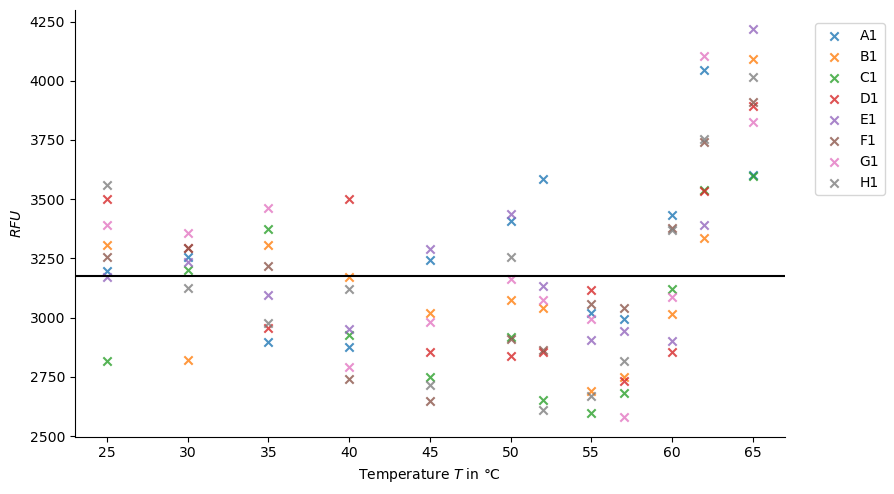

In [5]:
#535_595
blank_df_530_595 = blank_df.loc[(blank_df["excitation wavelength (nm)"] == 535)   &   (blank_df["emission wavelength (nm)"] == 595)    ]

# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="temperature (°C)", y="value (x)", data=blank_df_530_595, fit_reg=False, hue='wellnumber', legend=False, aspect=1.61, markers='x')
#plt.plot('temperature (°C)', 'value (x)', data=blank_df_530_595, linestyle='-', marker='o', hue='wellnumber' )
plt.axhline(y=3175.0104166666665, color='black', linestyle='-')
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.55))
plt.xlabel('Temperature $T$ in °C')
plt.ylabel("$\mathit{RFU}$")
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_blank_Cy3.png', dpi=600, bbox_inches="tight")
plt.show()

In [6]:
mean_blank_530_595 = blank_df_530_595.iloc[:,4].mean()
mean_blank_530_595

3175.0104166666665

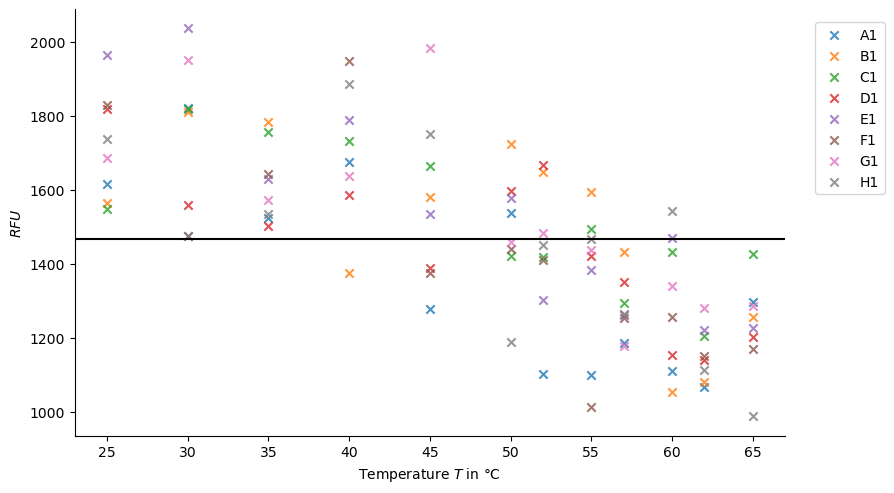

In [7]:
# 535_660
blank_df_530_670 = blank_df.loc[(blank_df["excitation wavelength (nm)"] == 535)   &   (blank_df["emission wavelength (nm)"] == 660)    ]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="temperature (°C)", y="value (x)", data=blank_df_530_670, fit_reg=False, hue='wellnumber', legend=False, aspect=1.61, markers='x')
#plt.plot('temperature (°C)', 'value (x)', data=blank_df_530_595, linestyle='-', marker='o', hue='wellnumber' )
plt.axhline(y=1467.4583333333333, color='black', linestyle='-')
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.55))
plt.xlabel('Temperature $T$ in °C')
plt.ylabel("$\mathit{RFU}$")
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_blank_Cy3_Cy5.png', dpi=600, bbox_inches="tight")
plt.show()

In [8]:
mean_blank_530_670 = blank_df_530_670.iloc[:,4].mean()
mean_blank_530_670

1467.4583333333333

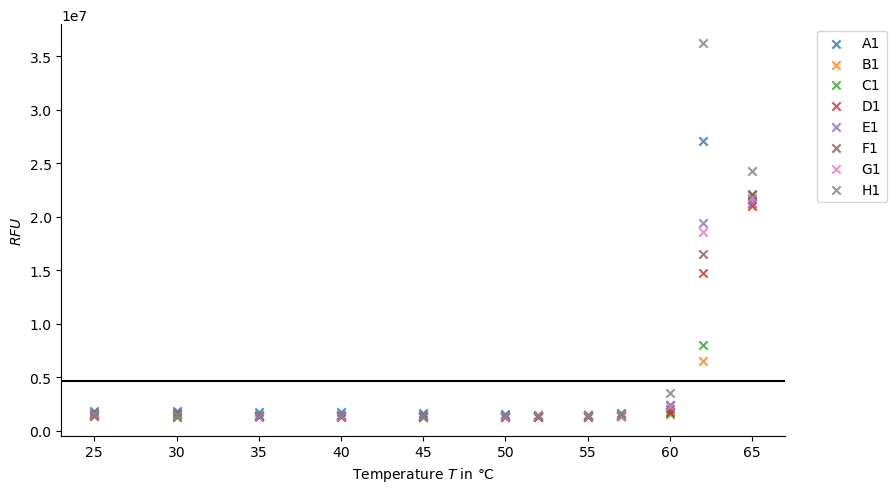

In [9]:
# 630_660
blank_df_630_670 = blank_df.loc[(blank_df["excitation wavelength (nm)"] == 630)   &   (blank_df["emission wavelength (nm)"] == 660)    ]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="temperature (°C)", y="value (x)", data=blank_df_630_670, fit_reg=False, hue='wellnumber', legend=False, aspect=1.61, markers='x')
#plt.plot('temperature (°C)', 'value (x)', data=blank_df_530_595, linestyle='-', marker='o', hue='wellnumber' )
plt.axhline(y=4612617.71875, color='black', linestyle='-')
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.55))
plt.xlabel('Temperature $T$ in °C')
plt.ylabel("$\mathit{RFU}$")
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_blank_Cy5.png', dpi=600, bbox_inches="tight")
plt.show()

In [10]:
mean_blank_630_670 = blank_df_630_670.iloc[:,4].mean()
mean_blank_630_670

4612617.71875

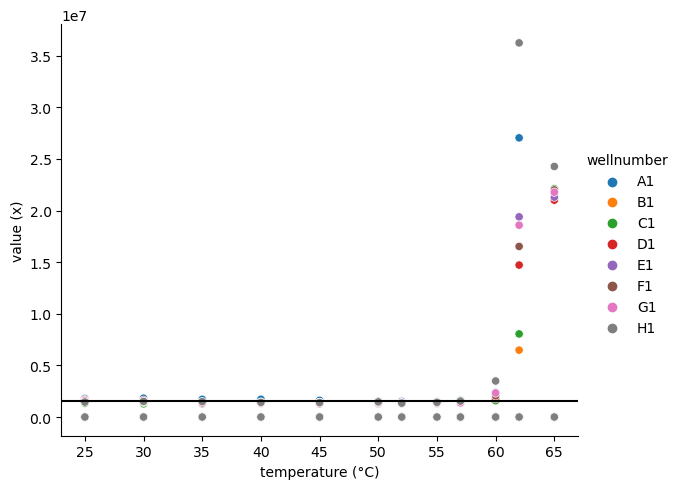

In [11]:
sns.relplot(data=blank_df, x="temperature (°C)", y="value (x)", hue='wellnumber', legend=True, aspect=1.2, markers='x')
plt.axhline(y=1539086.7291666667, color='black', linestyle='-')
#plt.savefig("2023_04_13_RNA_KCl_all_blanks.png", dpi=600, bbox_inches="tight")
plt.show()

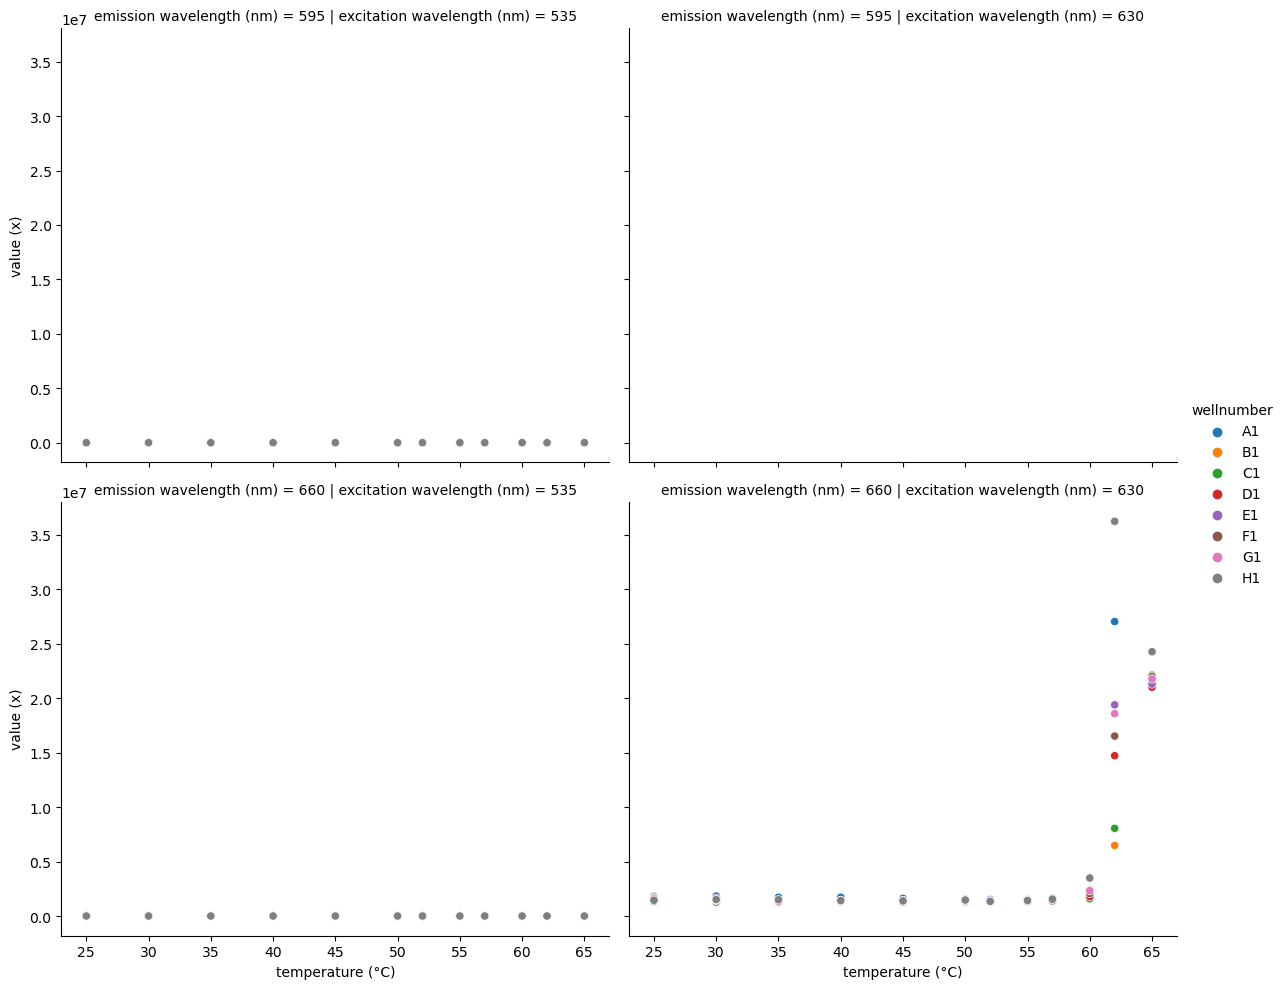

In [12]:
sns.relplot(data=blank_df, x="temperature (°C)", y="value (x)", hue='wellnumber', col="excitation wavelength (nm)", \
            row="emission wavelength (nm)", legend=True, aspect=1.2, markers='x')
#plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-04-26/2023-04-26_DNA_blank.png', dpi=600, bbox_inches="tight")
plt.show()

In [13]:
mean_blank = blank_df.iloc[:,4].mean()
mean_blank

1539086.7291666667

In [14]:
newdata["Measurement1_25°C"]

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,value (x),blank
0,535,595,25,A1,3195,True
1,535,595,25,A10,1687471,False
2,535,595,25,A2,1841308,False
3,535,595,25,A3,1487886,False
4,535,595,25,A4,1530559,False
...,...,...,...,...,...,...
235,630,660,25,H5,10829572,False
236,630,660,25,H6,18240354,False
237,630,660,25,H7,8667145,False
238,630,660,25,H8,19994142,False


In [15]:
#for i, name in enumerate(newdata.keys()):
 #   if "Measurement" in name and "Em" not in name: #and "FRET" in name:
  #      newdata[name]["bg_corr"] = newdata[name]["value (x)"]-mean_blank

#### Brechnung I´unf I´´

In [16]:
# dictionary fuer Konzentrationen im Well
conc_well = {"A3":0,
             "B3":1,
             "C3":5,
             "D3":10,
             "E3":25,
             "F3":50,
             "G3":75,
             "H3":100,
             "A4":500,
             "A5":0,
             "B5":1,
             "C5":5,
             "D5":10,
             "E5":25,
             "F5":50,
             "G5":75,
             "H5":100,
             "A6":500,
             "A7":0,
             "B7":1,
             "C7":5,
             "D7":10,
             "E7":25,
             "F7":50,
             "G7":75,
             "H7":100,
             "A8":500,
             "A9":0,
             "B9":1,
             "C9":5,
             "D9":10,
             "E9":25,
             "F9":50,
             "G9":75,
             "H9":100,
             "A10":500,
             "A2":0,
             "B2":0
}

In [17]:
def add_new_column(dataframe, value_column_name, dictionary, new_column_name):
    """
    Adds a new column to a pandas DataFrame based on a value in a specified column, using a dictionary to map the value to
    a new value for the new column.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame to modify.
    value_column_name (str): The name of the column to use as the source for the value to map to a new value.
    dictionary (dict): The dictionary to use to map the value to a new value for the new column.
    new_column_name (str): The name of the new column to add to the DataFrame.

    Returns:
    pandas.DataFrame: The modified DataFrame with the new column added.
    """
    new_column_values = []

    for index, row in dataframe.iterrows():
        value = row[value_column_name]

        if value in dictionary:
            new_value = dictionary[value]
        else:
            new_value = None

        new_column_values.append(new_value)

    dataframe[new_column_name] = new_column_values

    return dataframe

In [18]:
# dictionary fuer Konzentrationen im Well
ion_well = {"A3":'K(I)',
             "B3":'K(I)',
             "C3":'K(I)',
             "D3":'K(I)',
             "E3":'K(I)',
             "F3":'K(I)',
             "G3":'K(I)',
             "H3":'K(I)',
             "A4":'K(I)',
             "A5":'Na(I)',
             "B5":'Na(I)',
             "C5":'Na(I)',
             "D5":'Na(I)',
             "E5":'Na(I)',
             "F5":'Na(I)',
             "G5":'Na(I)',
             "H5":'Na(I)',
             "A6":'Na(I)',
             "A7":'K(I) mit Biotin',
             "B7":'K(I) mit Biotin',
             "C7":'K(I) mit Biotin',
             "D7":'K(I) mit Biotin',
             "E7":'K(I) mit Biotin',
             "F7":'K(I) mit Biotin',
             "G7":'K(I) mit Biotin',
             "H7":'K(I) mit Biotin',
             "A8":'K(I) mit Biotin',
             "A9":'Na(I) mit Biotin',
             "B9":'Na(I) mit Biotin',
             "C9":'Na(I) mit Biotin',
             "D9":'Na(I) mit Biotin',
             "E9":'Na(I) mit Biotin',
             "F9":'Na(I) mit Biotin',
             "G9":'Na(I) mit Biotin',
             "H9":'Na(I) mit Biotin',
             "A10":'Na(I) mit Biotin',
             "A2":'DNA+H$_2$O',
             "B2":'DNA+H$_2$O'
}

In [19]:
FRET_data = []
for i, name in enumerate(newdata.keys()):
    if "Measurement" in name and "Em" not in name:# and "FRET" in name:
        df_conc = add_new_column(newdata[name], "wellnumber", conc_well, "concentration (mM)")
        FRET_data.append(df_conc)
df_FRET = pd.concat(FRET_data)
df_FRET

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,value (x),blank,concentration (mM)
0,535,595,25,A1,3195,True,NaN
1,535,595,25,A10,1687471,False,500.0
2,535,595,25,A2,1841308,False,0.0
3,535,595,25,A3,1487886,False,0.0
4,535,595,25,A4,1530559,False,500.0
...,...,...,...,...,...,...,...
235,630,660,65,H5,20159866,False,100.0
236,630,660,65,H6,21428742,False,NaN
237,630,660,65,H7,18158514,False,100.0
238,630,660,65,H8,28292518,False,NaN


In [20]:
FRET_data = []
for i, name in enumerate(newdata.keys()):
    if "Measurement" in name and "Em" not in name:# and "FRET" in name:
        df_conc = add_new_column(newdata[name], "wellnumber", ion_well, "iontyp")
        FRET_data.append(df_conc)
df_FRET = pd.concat(FRET_data)
df_FRET

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,value (x),blank,concentration (mM),iontyp
0,535,595,25,A1,3195,True,NaN,None
1,535,595,25,A10,1687471,False,500.0,Na(I) mit Biotin
2,535,595,25,A2,1841308,False,0.0,DNA+H$_2$O
3,535,595,25,A3,1487886,False,0.0,K(I)
4,535,595,25,A4,1530559,False,500.0,K(I)
...,...,...,...,...,...,...,...,...
235,630,660,65,H5,20159866,False,100.0,Na(I)
236,630,660,65,H6,21428742,False,NaN,None
237,630,660,65,H7,18158514,False,100.0,K(I) mit Biotin
238,630,660,65,H8,28292518,False,NaN,None


In [21]:
df_FRET = df_FRET[df_FRET['concentration (mM)'].notna()] # NaN entfernt
print(df_FRET["wellnumber"].unique())

['A10' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'B2' 'B3' 'B5' 'B7' 'B9'
 'C3' 'C5' 'C7' 'C9' 'D3' 'D5' 'D7' 'D9' 'E3' 'E5' 'E7' 'E9' 'F3' 'F5'
 'F7' 'F9' 'G3' 'G5' 'G7' 'G9' 'H3' 'H5' 'H7' 'H9']


In [22]:
df_FRET

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,value (x),blank,concentration (mM),iontyp
1,535,595,25,A10,1687471,False,500.0,Na(I) mit Biotin
2,535,595,25,A2,1841308,False,0.0,DNA+H$_2$O
3,535,595,25,A3,1487886,False,0.0,K(I)
4,535,595,25,A4,1530559,False,500.0,K(I)
5,535,595,25,A5,1520939,False,0.0,Na(I)
...,...,...,...,...,...,...,...,...
229,630,660,65,G9,17879212,False,75.0,Na(I) mit Biotin
233,630,660,65,H3,24223024,False,100.0,K(I)
235,630,660,65,H5,20159866,False,100.0,Na(I)
237,630,660,65,H7,18158514,False,100.0,K(I) mit Biotin


In [23]:
# hier jetzt Aufteilung in IDD, IAD, IAA
idd = df_FRET[df_FRET["emission wavelength (nm)"].astype(str).str.contains('595') & \
    df_FRET["excitation wavelength (nm)"].astype(str).str.contains('535')] 
idd = idd.sort_values(by=['wellnumber', 'temperature (°C)']) # df sortieren
idd.columns = [f'I^Dem_Dex' if x == 'value (x)' else x for x in idd.columns] # spalte "values (x)" umbenennen
idd = idd.reset_index(drop=True) # zeilenindizes zurücksetzen 
idd = idd.drop(columns=['excitation wavelength (nm)', 'emission wavelength (nm)']) # wl-spalten löschen

iad = df_FRET[df_FRET["emission wavelength (nm)"].astype(str).str.contains('660') & \
    df_FRET["excitation wavelength (nm)"].astype(str).str.contains('535')]
iad = iad.sort_values(by=['wellnumber', 'temperature (°C)']) # df sortieren
iad.columns = [f'I^Aem_Dex' if x == 'value (x)' else x for x in iad.columns] # spalte "values (x)" umbenennen
iad = iad.reset_index(drop=True) # zeilenindizes zurücksetzen 
iad = iad.drop(columns=['excitation wavelength (nm)', 'emission wavelength (nm)']) # wl-spalten löschen


iaa = df_FRET[df_FRET["emission wavelength (nm)"].astype(str).str.contains('660') & \
    df_FRET["excitation wavelength (nm)"].astype(str).str.contains('630')]
iaa = iaa.sort_values(by=['wellnumber', 'temperature (°C)']) # df sortieren
iaa.columns = [f'I^Aem_Aex' if x == 'value (x)' else x for x in iaa.columns] # spalte "values (x)" umbenennen
iaa = iaa.reset_index(drop=True) # zeilenindizes zurücksetzen 
iaa = iaa.drop(columns=['excitation wavelength (nm)', 'emission wavelength (nm)']) # wl-spalten löschen

In [24]:
idd

,temperature (°C),wellnumber,I^Dem_Dex,blank,concentration (mM),iontyp
0,25,A10,1687471,False,500.0,Na(I) mit Biotin
1,30,A10,1616555,False,500.0,Na(I) mit Biotin
2,35,A10,1530069,False,500.0,Na(I) mit Biotin
3,40,A10,1395517,False,500.0,Na(I) mit Biotin
4,45,A10,1240669,False,500.0,Na(I) mit Biotin
...,...,...,...,...,...,...
451,55,H9,690150,False,100.0,Na(I) mit Biotin
452,57,H9,504903,False,100.0,Na(I) mit Biotin
453,60,H9,285920,False,100.0,Na(I) mit Biotin
454,62,H9,142350,False,100.0,Na(I) mit Biotin


In [25]:
# hier wird das neue dataframe "gebaut":
# spalten: temp, wellnum, i_dd, i_ad, i_aa
df_I = pd.merge(idd, iad, on=['temperature (°C)', 'wellnumber', 'concentration (mM)'])
df_I = pd.merge(df_I, iaa, on=['temperature (°C)', 'wellnumber', 'concentration (mM)'])
df_I

,temperature (°C),wellnumber,I^Dem_Dex,blank_x,concentration (mM),iontyp_x,I^Aem_Dex,blank_y,iontyp_y,I^Aem_Aex,blank,iontyp
0,25,A10,1687471,False,500.0,Na(I) mit Biotin,2381648,False,Na(I) mit Biotin,7250330,False,Na(I) mit Biotin
1,30,A10,1616555,False,500.0,Na(I) mit Biotin,2207730,False,Na(I) mit Biotin,6958038,False,Na(I) mit Biotin
2,35,A10,1530069,False,500.0,Na(I) mit Biotin,1999199,False,Na(I) mit Biotin,6520796,False,Na(I) mit Biotin
3,40,A10,1395517,False,500.0,Na(I) mit Biotin,1791419,False,Na(I) mit Biotin,6159362,False,Na(I) mit Biotin
4,45,A10,1240669,False,500.0,Na(I) mit Biotin,1564780,False,Na(I) mit Biotin,5743922,False,Na(I) mit Biotin
...,...,...,...,...,...,...,...,...,...,...,...,...
451,55,H9,690150,False,100.0,Na(I) mit Biotin,1129364,False,Na(I) mit Biotin,4597336,False,Na(I) mit Biotin
452,57,H9,504903,False,100.0,Na(I) mit Biotin,782881,False,Na(I) mit Biotin,3429516,False,Na(I) mit Biotin
453,60,H9,285920,False,100.0,Na(I) mit Biotin,429308,False,Na(I) mit Biotin,2739190,False,Na(I) mit Biotin
454,62,H9,142350,False,100.0,Na(I) mit Biotin,190036,False,Na(I) mit Biotin,8845032,False,Na(I) mit Biotin


In [26]:
# 2 leere listen für i'_dd und i'_ad erstellen
iSTRICHdd_list = []
iSTRICHad_list = []

#bt-Korrektur
# 2 schleifen für die Berechnung von i'_dd und i'_ad
# i'_dd:
bt_a = 0
bt_d = 0.1314

for index, row in df_I.iterrows():
    iSTRICHdd = df_I["I^Dem_Dex"].iloc[index] - bt_a * df_I["I^Aem_Dex"].iloc[index]
    iSTRICHdd_list.append(iSTRICHdd) # für jede zeile im df die berechneten werte angehängt

# i'_ad:
for index, row in df_I.iterrows():
    iSTRICHad = df_I["I^Aem_Dex"].iloc[index] - bt_d * df_I["I^Dem_Dex"].iloc[index]
    iSTRICHad_list.append(iSTRICHad) # für jede zeile im df die berechneten werte angehängt


# die listen als neue Spalten ans df anfügen (an der richtigen Stelle dann auch):
df_I.insert(4, 'I`^Dem_Dex', iSTRICHdd_list)
df_I.insert(6, 'I`^Aem_Dex', iSTRICHad_list)

In [27]:
df_II = df_I.copy()
# 2 leere listen für i''_dd und i''_ad erstellen
iSTRICH2dd_list = []
iSTRICH2ad_list = []
# 2 schleifen für die Berechnung von i''_dd und i''_ad
# i''_dd: (dED_correction)

dE_A = 0.0215

for index, row in df_I.iterrows():
    # iSTRICH2dd = df_I["I`^Dem_Dex"].iloc[index] - dE_A * df_I["I^Dem_Aex"].iloc[index]
    iSTRICH2dd = df_I["I`^Dem_Dex"].iloc[index]
    iSTRICH2dd_list.append(iSTRICH2dd) # für jede zeile im df die berechneten werte angehängt

# i''_ad:
for index, row in df_I.iterrows():
    iSTRICH2ad = df_I["I`^Aem_Dex"].iloc[index] - dE_A * df_I["I^Aem_Aex"].iloc[index]
    iSTRICH2ad_list.append(iSTRICH2ad) # für jede zeile im df die berechneten werte angehängt


# die listen als neue Spalten ans df anfügen (an der richtigen Stelle dann auch):
df_II.insert(5, 'I``^Dem_Dex', iSTRICH2dd_list)
df_II.insert(8, 'I``^Aem_Dex', iSTRICH2ad_list)

In [28]:
# speichern damit wir das nicht jedes Mal machen müssen! 
df_II.to_csv('2023-05-11_DNA_FRET_ohne_blank_bearbeitet.csv', index=False)

#### FRET Berechnen

In [29]:
# und hier wieder einlesen: 
df_II = pd.read_csv('2023-05-11_DNA_FRET_ohne_blank_bearbeitet.csv')
df_II["FRET"] = df_II["I``^Aem_Dex"]/(df_II["I``^Dem_Dex"]+df_II["I``^Aem_Dex"])
df_II

,temperature (°C),wellnumber,I^Dem_Dex,blank_x,I`^Dem_Dex,I``^Dem_Dex,concentration (mM),I`^Aem_Dex,I``^Aem_Dex,iontyp_x,I^Aem_Dex,blank_y,iontyp_y,I^Aem_Aex,blank,iontyp,FRET
0,25,A10,1687471,False,1687471,1687471,500.0,2.159914e+06,2.004032e+06,Na(I) mit Biotin,2381648,False,Na(I) mit Biotin,7250330,False,Na(I) mit Biotin,0.542877
1,30,A10,1616555,False,1616555,1616555,500.0,1.995315e+06,1.845717e+06,Na(I) mit Biotin,2207730,False,Na(I) mit Biotin,6958038,False,Na(I) mit Biotin,0.533094
2,35,A10,1530069,False,1530069,1530069,500.0,1.798148e+06,1.657951e+06,Na(I) mit Biotin,1999199,False,Na(I) mit Biotin,6520796,False,Na(I) mit Biotin,0.520057
3,40,A10,1395517,False,1395517,1395517,500.0,1.608048e+06,1.475622e+06,Na(I) mit Biotin,1791419,False,Na(I) mit Biotin,6159362,False,Na(I) mit Biotin,0.513950
4,45,A10,1240669,False,1240669,1240669,500.0,1.401756e+06,1.278262e+06,Na(I) mit Biotin,1564780,False,Na(I) mit Biotin,5743922,False,Na(I) mit Biotin,0.507462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,55,H9,690150,False,690150,690150,100.0,1.038678e+06,9.398356e+05,Na(I) mit Biotin,1129364,False,Na(I) mit Biotin,4597336,False,Na(I) mit Biotin,0.576591
452,57,H9,504903,False,504903,504903,100.0,7.165367e+05,6.428022e+05,Na(I) mit Biotin,782881,False,Na(I) mit Biotin,3429516,False,Na(I) mit Biotin,0.560076
453,60,H9,285920,False,285920,285920,100.0,3.917381e+05,3.328455e+05,Na(I) mit Biotin,429308,False,Na(I) mit Biotin,2739190,False,Na(I) mit Biotin,0.537919
454,62,H9,142350,False,142350,142350,100.0,1.713312e+05,-1.883698e+04,Na(I) mit Biotin,190036,False,Na(I) mit Biotin,8845032,False,Na(I) mit Biotin,-0.152510


In [30]:
df_II.iloc[75:125]

,temperature (°C),wellnumber,I^Dem_Dex,blank_x,I`^Dem_Dex,I``^Dem_Dex,concentration (mM),I`^Aem_Dex,I``^Aem_Dex,iontyp_x,I^Aem_Dex,blank_y,iontyp_y,I^Aem_Aex,blank,iontyp,FRET
75,40,A7,1357581,False,1357581,1357581,0.0,2.108716e+06,1.932967e+06,K(I) mit Biotin,2287102,False,K(I) mit Biotin,8174346,False,K(I) mit Biotin,0.587430
76,45,A7,1156599,False,1156599,1156599,0.0,1.837735e+06,1.673994e+06,K(I) mit Biotin,1989712,False,K(I) mit Biotin,7615858,False,K(I) mit Biotin,0.591393
77,50,A7,964878,False,964878,964878,0.0,1.579190e+06,1.433218e+06,K(I) mit Biotin,1705975,False,K(I) mit Biotin,6789378,False,K(I) mit Biotin,0.597648
78,52,A7,845457,False,845457,845457,0.0,1.372514e+06,1.240395e+06,K(I) mit Biotin,1483607,False,K(I) mit Biotin,6145089,False,K(I) mit Biotin,0.594671
79,55,A7,681755,False,681755,681755,0.0,1.103780e+06,9.918081e+05,K(I) mit Biotin,1193363,False,K(I) mit Biotin,5208012,False,K(I) mit Biotin,0.592633
80,57,A7,523970,False,523970,523970,0.0,8.263523e+05,7.364594e+05,K(I) mit Biotin,895202,False,K(I) mit Biotin,4181067,False,K(I) mit Biotin,0.584292
81,60,A7,329995,False,329995,329995,0.0,4.862127e+05,4.194808e+05,K(I) mit Biotin,529574,False,K(I) mit Biotin,3103806,False,K(I) mit Biotin,0.559699
82,62,A7,188048,False,188048,188048,0.0,2.598325e+05,1.883790e+05,K(I) mit Biotin,284542,False,K(I) mit Biotin,3323420,False,K(I) mit Biotin,0.500440
83,65,A7,126758,False,126758,126758,0.0,2.575650e+05,-4.469550e+04,K(I) mit Biotin,274221,False,K(I) mit Biotin,14058628,False,K(I) mit Biotin,-0.544652
84,25,A8,1400963,False,1400963,1400963,500.0,1.706697e+06,1.575357e+06,K(I) mit Biotin,1890784,False,K(I) mit Biotin,6108856,False,K(I) mit Biotin,0.529297


#### Grafische Darstellung der Daten

#### FRET in Abhänigkeit der Temperatur

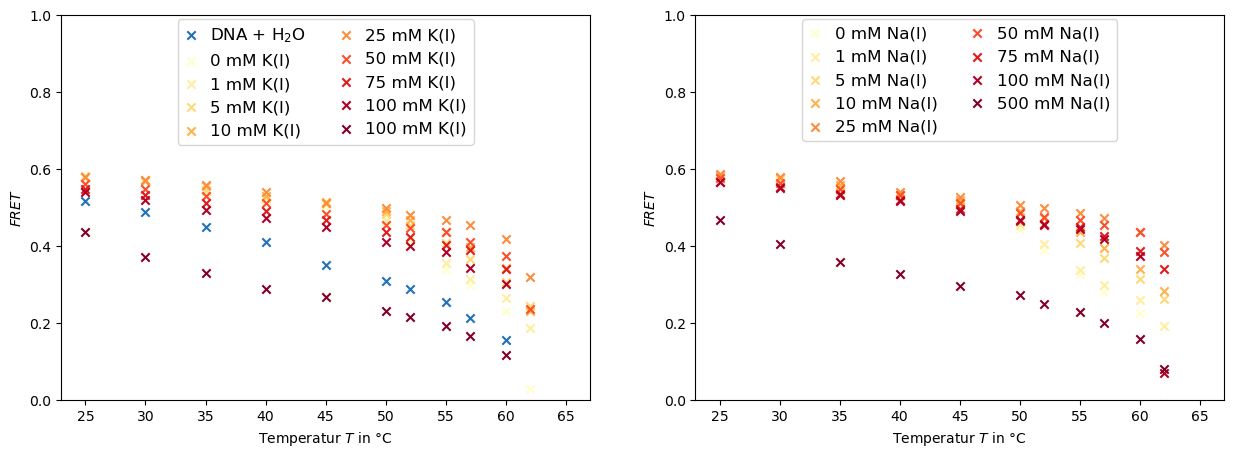

In [31]:
#DNA Hairpin

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(15,5),sharex=False, sharey=False, squeeze=False)

ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A2")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A2")["FRET"], marker="x", color="#2171b5", label='DNA + H$_2$O')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A3")["FRET"], marker="x", color="#ffffcc", label='0 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="B3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B3")["FRET"], marker="x", color="#ffeda0", label='1 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="C3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C3")["FRET"], marker="x", color="#fed976", label='5 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="D3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D3")["FRET"], marker="x", color="#feb24c", label='10 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="E3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E3")["FRET"], marker="x", color="#fd8d3c", label='25 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="F3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F3")["FRET"], marker="x", color="#fc4e2a", label='50 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="G3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G3")["FRET"], marker="x", color="#e31a1c", label='75 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="H3")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H3")["FRET"], marker="x", color="#b10026", label='100 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A4")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A4")["FRET"], marker="x", color="#800026", label='100 mM K(I)')

ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A5")["FRET"], marker="x", color="#ffffcc", label='0 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="B5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B5")["FRET"], marker="x", color="#ffeda0", label='1 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="C5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C5")["FRET"], marker="x", color="#fed976", label='5 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="D5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D5")["FRET"], marker="x", color="#feb24c", label='10 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="E5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E5")["FRET"], marker="x", color="#fd8d3c", label='25 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="F5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F5")["FRET"], marker="x", color="#fc4e2a", label='50 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="G5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G5")["FRET"], marker="x", color="#e31a1c", label='75 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="H5")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H5")["FRET"], marker="x", color="#b10026", label='100 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A6")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A6")["FRET"], marker="x", color="#800026", label='500 mM Na(I)')
#plt_legend=
ax[0,0].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=2)
#legend_text_right_align(plt_legend, 140)
#plt_legend=
ax[0,1].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=2)
#legend_text_right_align(plt_legend, 220)
#ax[0,0].set_xlim([540,660])
#ax[0,1].set_xlim([540,660])
ax[0,0].set_ylim([0,1])
ax[0,1].set_ylim([0,1])
#plt.title("Emission von Cy3 mit DNA")
#plt.xlabel('Temperature in °C')
#plt.ylabel("FRET")

plt.setp(ax[:, :], xlabel='Temperatur $\mathit{T}$ in °C ')
plt.setp(ax[:, :], ylabel='$\mathit{FRET}$')
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_Hairpin_temp.png', dpi=600, bbox_inches="tight")
plt.show()

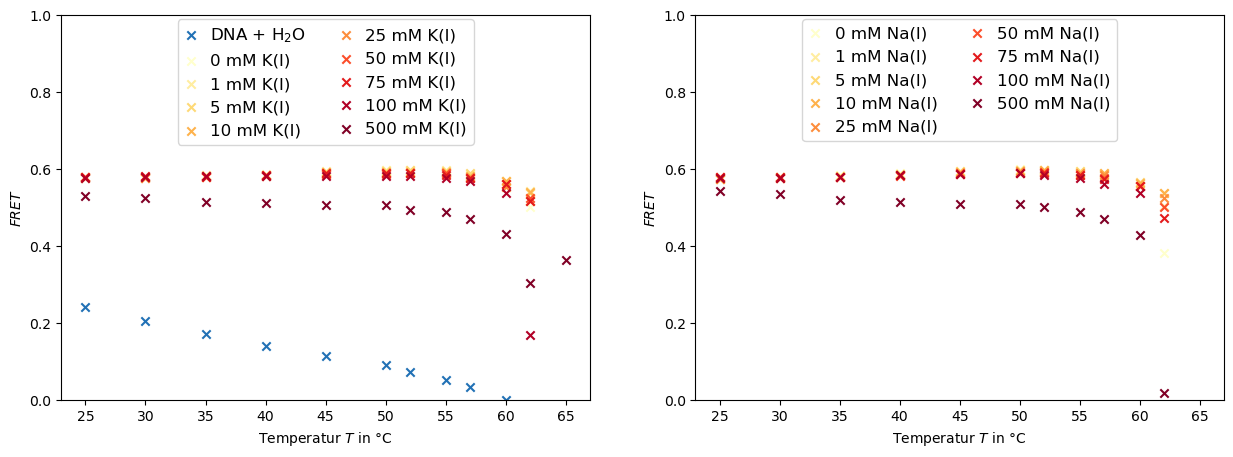

In [32]:
# DNA mit Biotin

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(15,5),sharex=False, sharey=False, squeeze=False)

ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="B2")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B2")["FRET"], marker="x", color="#2171b5", label='DNA + H$_2$O')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A7")["FRET"], marker="x", color="#ffffcc", label='0 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="B7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B7")["FRET"], marker="x", color="#ffeda0", label='1 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="C7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C7")["FRET"], marker="x", color="#fed976", label='5 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="D7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D7")["FRET"], marker="x", color="#feb24c", label='10 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="E7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E7")["FRET"], marker="x", color="#fd8d3c", label='25 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="F7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F7")["FRET"], marker="x", color="#fc4e2a", label='50 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="G7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G7")["FRET"], marker="x", color="#e31a1c", label='75 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="H7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H7")["FRET"], marker="x", color="#b10026", label='100 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A8")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A8")["FRET"], marker="x", color="#800026", label='500 mM K(I)')

ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A9")["FRET"], marker="x", color="#ffffcc", label='0 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="B9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B9")["FRET"], marker="x", color="#ffeda0", label='1 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="C9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C9")["FRET"], marker="x", color="#fed976", label='5 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="D9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D9")["FRET"], marker="x", color="#feb24c", label='10 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="E9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E9")["FRET"], marker="x", color="#fd8d3c", label='25 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="F9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F9")["FRET"], marker="x", color="#fc4e2a", label='50 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="G9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G9")["FRET"], marker="x", color="#e31a1c", label='75 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="H9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H9")["FRET"], marker="x", color="#b10026", label='100 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A10")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A10")["FRET"], marker="x", color="#800026", label='500 mM Na(I)')
#plt_legend=
ax[0,0].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=2)
#legend_text_right_align(plt_legend, 140)
#plt_legend=
ax[0,1].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=2)
#legend_text_right_align(plt_legend, 220)
#ax[0,0].set_xlim([540,660])
#ax[0,1].set_xlim([540,660])
ax[0,0].set_ylim([0,1])
ax[0,1].set_ylim([0,1])
#plt.title("Emission von Cy3 mit DNA")
#plt.xlabel('Temperature in °C')
#plt.ylabel("FRET")

plt.setp(ax[:, :], xlabel='Temperatur $\mathit{T}$ in °C ')
plt.setp(ax[:, :], ylabel='$\mathit{FRET}$')
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_Biotin_temp.png', dpi=600, bbox_inches="tight")
plt.show()

     temperature (°C) wellnumber  I^Dem_Dex  blank_x  I`^Dem_Dex  I``^Dem_Dex  \
31                 55         A3     788507    False      788507       788507   
43                 55         A4     815966    False      815966       815966   
127                55         B3     813072    False      813072       813072   
175                55         C3     836113    False      836113       836113   
223                55         D3     781000    False      781000       781000   
271                55         E3     792339    False      792339       792339   
319                55         F3     781138    False      781138       781138   
367                55         G3     765727    False      765727       765727   
415                55         H3     740142    False      740142       740142   

     concentration (mM)   I`^Aem_Dex  I``^Aem_Dex iontyp_x  I^Aem_Dex  \
31                  0.0  519170.1802  404800.6722     K(I)     622780   
43                500.0  255408.0676  19343

C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\938092234.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  left.set_xticklabels(['','0.00',''])
C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\938092234.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  right.set_xticklabels(values)


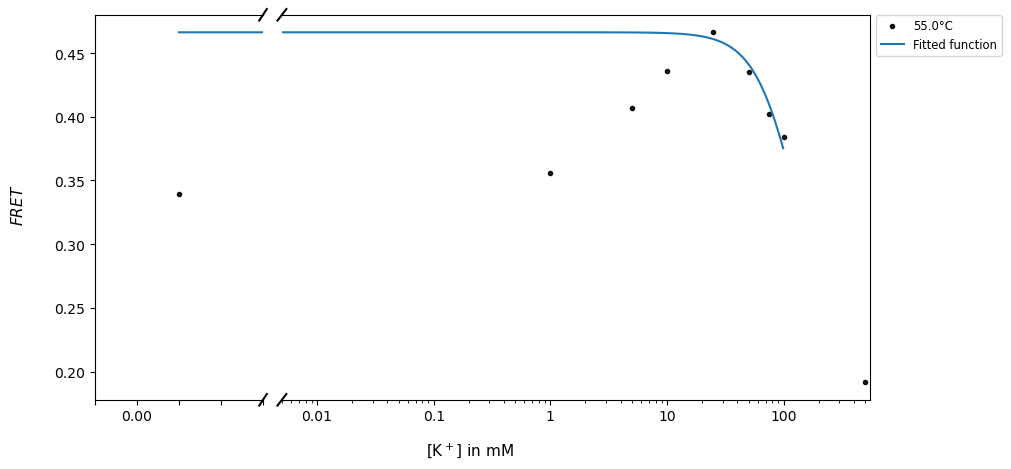

In [33]:
# filter the temperature 
filter_temperature = 55.0
filter_ion = 'K(I)'
filtered_df = df_II[(df_II["temperature (°C)"] ==filter_temperature) & (df_II["iontyp"] == filter_ion)]
print(filtered_df)

# define plot
f, (left, right) = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '${\mathregular {[K^+]}}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# calculate Hill parameters
def hill_function(Mg,k_eq,n):
    return max( filtered_df["FRET"]) - (max( filtered_df["FRET"]) - min( filtered_df["FRET"])) * ((Mg**n / (k_eq + Mg**n)))

params, params_covariance = optimize.curve_fit(hill_function, filtered_df["concentration (mM)"], filtered_df["FRET"])
print('K_eq ='), print(params[0]), print('n ='), print(params[1])

# draw plot for the two plots
left.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color='black', linewidth=1, alpha=0.9, label=f'{filter_temperature}°C')
right.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color='black', linewidth=1, alpha=0.9, label=f'{filter_temperature}°C')
right.plot(np.arange(0,100,1).reshape((-1,1)), hill_function(np.arange(0,100,1).reshape((-1,1)), params[0], params[1]),
         label='Fitted function')
left.plot(filtered_df["concentration (mM)"], hill_function(filtered_df["concentration (mM)"], params[0], params[1]),
         label='Fitted function')

# specifications for the left plot
#left.set_ylim([0,1])
left.set_xticklabels(['','0.00',''])
left.set_xlim(-0.005,0.005)
left.spines['right'].set_visible(False)

# specifications for the right plot
right.set_xscale('log')
right.set_xticklabels(values)
right.set_xlim(0.005, 550)
right.spines['left'].set_visible(False)
right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

#plt.text(10**-1,10**7,fr'y=max(filtered_df["FRET"])-(max(filtered_df["FRET"])-min(filtered_df["FRET"]))$\cdot$ (Mg**n)/(k_eq+Mg**n) ')

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', borderaxespad=0)
#plt.savefig("2023_04_13_RNA_KCl_61C.png", dpi=600, bbox_inches="tight")
plt.show()

[25 30 35 40 45 50 52 55 57 60 62]


C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\1977557108.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  left.set_xticklabels(['','','0.00',''])
C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\1977557108.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  right.set_xticklabels(values)


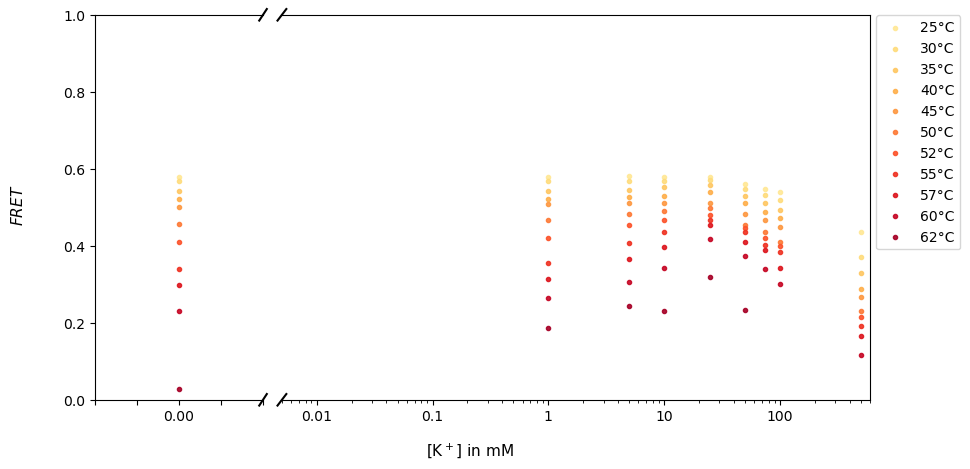

In [34]:
filter_ion = 'K(I)'


f, (left, right) = plt.subplots(1, 2,figsize=(10,5), sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '${\mathregular {[K^+]}}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# draw plot for the two plots
temps = df_II["temperature (°C)"].unique()
palette = plt.get_cmap('YlOrRd',len(temps)+2)
print(temps[:-1])
num=-1
for i in temps[:-1]:
    num+=1
    filtered_df = df_II[(df_II["temperature (°C)"] == i) & (df_II["iontyp"] == filter_ion)]
    def hill_function(Mg,k_eq,n):
        return  max(filtered_df["FRET"]) - (max(filtered_df["FRET"]) - min(filtered_df["FRET"])) * ((Mg**(n) / (k_eq + Mg**(n))))
    params, params_covariance = optimize.curve_fit(hill_function, filtered_df["concentration (mM)"], filtered_df["FRET"])
    #print('K_eq ='), print(params[0]), print('n ='), print(params[1]) 
    left.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
   # right.plot(np.arange(0,100,1).reshape((-1,1)), hill_function(np.arange(0,100,1).reshape((-1,1)), params[0], params[1]), color=palette(num))
    #left.plot(np.arange(0,0.005,0.0001).reshape((-1,1)), hill_function(np.arange(0,0.005,0.0001).reshape((-1,1)), params[0], params[1]),color=palette(num))
    
# specifications for the left plot
    left.set_ylim([0, 1])
    left.set_xticklabels(['','','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.set_ylim(0.35, 1)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 600)
    right.set_ylim(0, 1)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)


# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='10', borderaxespad=0)
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_KCl_Hairpin_titration.png', dpi=600, bbox_inches="tight")
plt.show()

[25 30 35 40 45 50 52 55 57 60 62]


C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\4237663681.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  left.set_xticklabels(['','','0.00',''])
C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\4237663681.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  right.set_xticklabels(values)


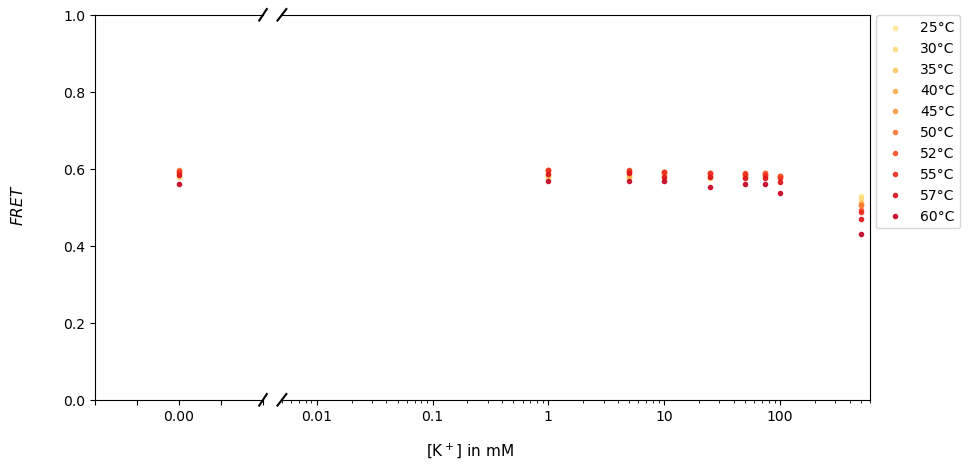

In [35]:
filter_ion = 'K(I) mit Biotin'


f, (left, right) = plt.subplots(1, 2,figsize=(10,5), sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '${\mathregular {[K^+]}}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# draw plot for the two plots
temps = df_II["temperature (°C)"].unique()
palette = plt.get_cmap('YlOrRd',len(temps)+2)
print(temps[:-1])
num=-1
for i in temps[:-2]:
    num+=1
    filtered_df = df_II[(df_II["temperature (°C)"] == i) & (df_II["iontyp"] == filter_ion)]
    def hill_function(Mg,k_eq,n):
        return  max(filtered_df["FRET"]) - (max(filtered_df["FRET"]) - min(filtered_df["FRET"])) * ((Mg**(n) / (k_eq + Mg**(n))))
    #params, params_covariance = optimize.curve_fit(hill_function, filtered_df["concentration (mM)"], filtered_df["FRET"])
    #print('K_eq ='), print(params[0]), print('n ='), print(params[1]) 
    left.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
   # right.plot(np.arange(0,100,1).reshape((-1,1)), hill_function(np.arange(0,100,1).reshape((-1,1)), params[0], params[1]), color=palette(num))
    #left.plot(np.arange(0,0.005,0.0001).reshape((-1,1)), hill_function(np.arange(0,0.005,0.0001).reshape((-1,1)), params[0], params[1]),color=palette(num))
      
# specifications for the left plot
    left.set_ylim([0.4, 0.7])
    left.set_xticklabels(['','','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.set_ylim(0.35, 1)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 600)
    right.set_ylim(0, 1)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='10', borderaxespad=0)
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_KCl_Biotin_titration.png', dpi=600, bbox_inches="tight")
plt.show()

[25 30 35 40 45 50 52 55 57 60 62]


C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\2506020544.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  left.set_xticklabels(['','','0.00',''])
C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\2506020544.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  right.set_xticklabels(values)


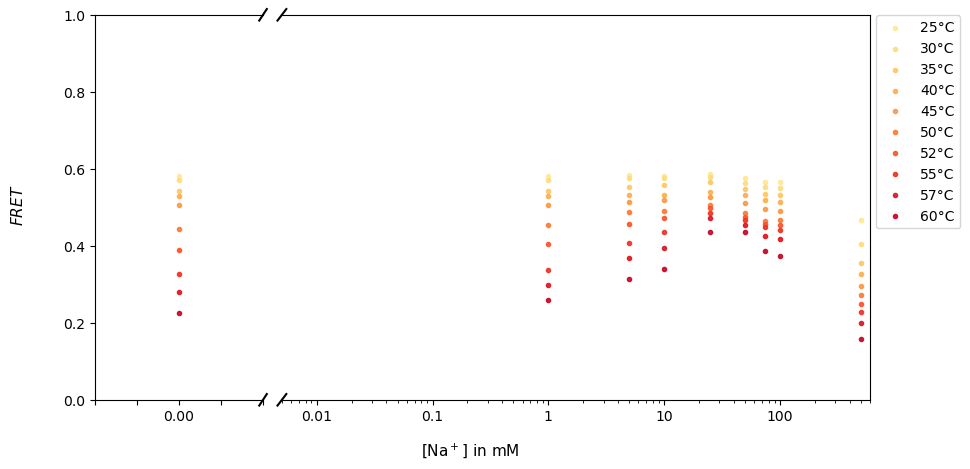

In [36]:
filter_ion = 'Na(I)'


f, (left, right) = plt.subplots(1, 2,figsize=(10,5), sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '${\mathregular {[Na^+]}}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100','1000']

# draw plot for the two plots
temps = df_II["temperature (°C)"].unique()
palette = plt.get_cmap('YlOrRd',len(temps)+2)
print(temps[:-1])
num=-1
for i in temps[:-2]:
    num+=1
    filtered_df = df_II[(df_II["temperature (°C)"] == i) & (df_II["iontyp"] == filter_ion)]
    def hill_function(Mg,k_eq,n):
        return  max(filtered_df["FRET"]) - (max(filtered_df["FRET"]) - min(filtered_df["FRET"])) * ((Mg**(n) / (k_eq + Mg**(n))))
    params, params_covariance = optimize.curve_fit(hill_function, filtered_df["concentration (mM)"], filtered_df["FRET"])
    #print('K_eq ='), print(params[0]), print('n ='), print(params[1]) 
    left.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
 #   right.plot(np.arange(0,100,1).reshape((-1,1)), hill_function(np.arange(0,100,1).reshape((-1,1)), params[0], params[1]), color=palette(num))
  #  left.plot(np.arange(0,0.005,0.0001).reshape((-1,1)), hill_function(np.arange(0,0.005,0.0001).reshape((-1,1)), params[0], params[1]),color=palette(num))
      
# specifications for the left plot
    left.set_ylim([0, 1])
    left.set_xticklabels(['','','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.set_ylim(0.35,1)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 600)
    right.set_ylim(0, 1)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='10', borderaxespad=0)
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_NaCl_Hairpin_titration.png', dpi=600, bbox_inches="tight")
plt.show()

[25 30 35 40 45 50 52 55 57 60 62]


C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\531135157.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  left.set_xticklabels(['','','0.00',''])
C:\Users\meitz\AppData\Local\Temp\ipykernel_5996\531135157.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  right.set_xticklabels(values)


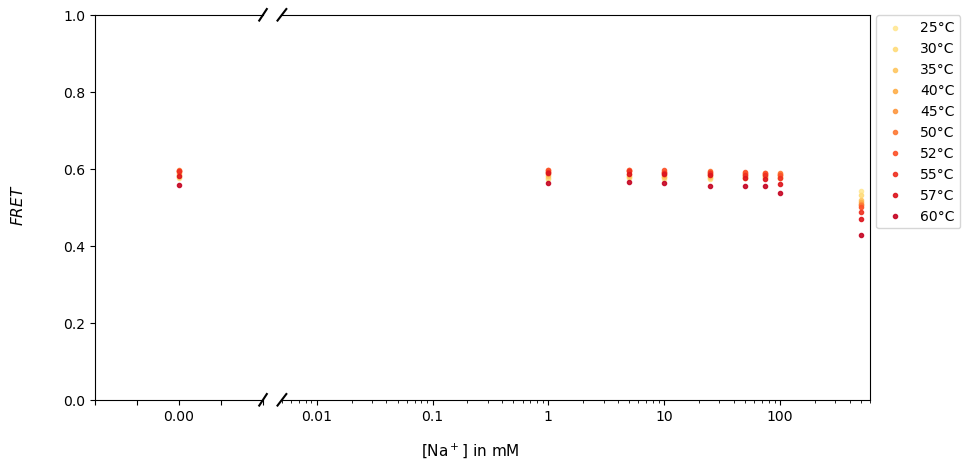

In [39]:
filter_ion = 'Na(I) mit Biotin'


f, (left, right) = plt.subplots(1, 2,figsize=(10,5), sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '${\mathregular {[Na^+]}}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# draw plot for the two plots
temps = df_II["temperature (°C)"].unique()
palette = plt.get_cmap('YlOrRd',len(temps)+2)
print(temps[:-1])
num=-1
for i in temps[:-2]:
    num+=1
    filtered_df = df_II[(df_II["temperature (°C)"] == i) & (df_II["iontyp"] == filter_ion)]
    def hill_function(Mg,k_eq,n):
        return  max(filtered_df["FRET"]) - (max(filtered_df["FRET"]) - min(filtered_df["FRET"])) * ((Mg**(n) / (k_eq + Mg**(n))))
   # params, params_covariance = optimize.curve_fit(hill_function, filtered_df["concentration (mM)"], filtered_df["FRET"])
    #print('K_eq ='), print(params[0]), print('n ='), print(params[1]) 
    left.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df["concentration (mM)"], filtered_df["FRET"], marker='.', color=palette(num+2), linewidth=1, alpha=0.9, label=str(i)+'°C')
 #   right.plot(np.arange(0,100,1).reshape((-1,1)), hill_function(np.arange(0,100,1).reshape((-1,1)), params[0], params[1]), color=palette(num))
  #  left.plot(np.arange(0,0.005,0.0001).reshape((-1,1)), hill_function(np.arange(0,0.005,0.0001).reshape((-1,1)), params[0], params[1]),color=palette(num))
      
# specifications for the left plot
    left.set_ylim([0.4, 0.7])
    left.set_xticklabels(['','','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.set_ylim(0.35, 0.6)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 600)
    right.set_ylim(0, 1)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='10', borderaxespad=0)
plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_NaCl_Biotin_titration.png', dpi=600, bbox_inches="tight")
plt.show()

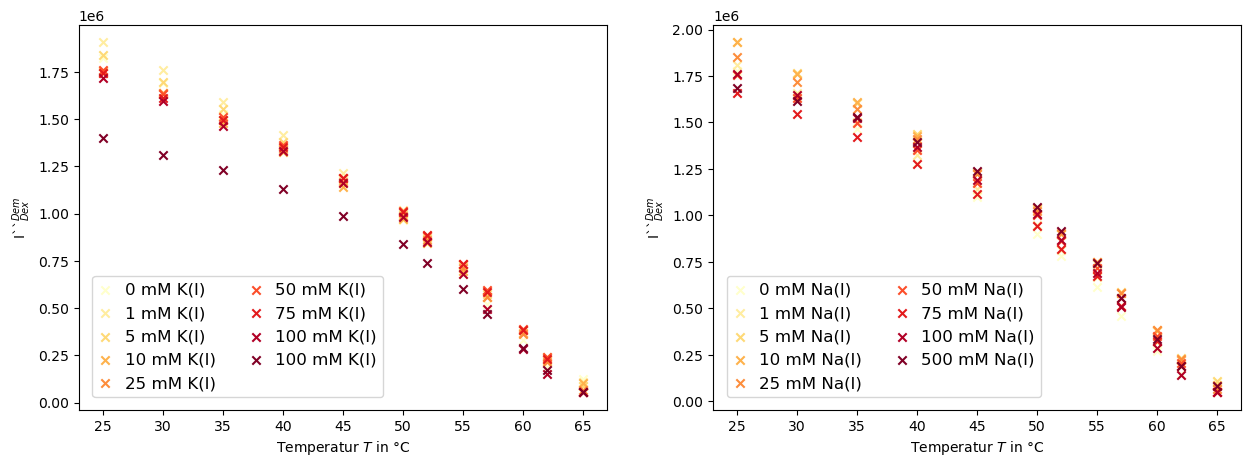

In [38]:
# DNA mit Biotin

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(15,5),sharex=False, sharey=False, squeeze=False)

#ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="C2")["temperature (°C)"], \
 #               blab.get_well(dataframe=df_II, wellnumber="C2")["I``^Dem_Dex"], marker="x", color="#2171b5", label='DNA + H$_2$O')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A7")["I``^Dem_Dex"], marker="x", color="#ffffcc", label='0 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="B7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B7")["I``^Dem_Dex"], marker="x", color="#ffeda0", label='1 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="C7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C7")["I``^Dem_Dex"], marker="x", color="#fed976", label='5 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="D7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D7")["I``^Dem_Dex"], marker="x", color="#feb24c", label='10 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="E7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E7")["I``^Dem_Dex"], marker="x", color="#fd8d3c", label='25 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="F7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F7")["I``^Dem_Dex"], marker="x", color="#fc4e2a", label='50 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="G7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G7")["I``^Dem_Dex"], marker="x", color="#e31a1c", label='75 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="H7")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H7")["I``^Dem_Dex"], marker="x", color="#b10026", label='100 mM K(I)')
ax[0,0].scatter(blab.get_well(dataframe=df_II, wellnumber="A8")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A8")["I``^Dem_Dex"], marker="x", color="#800026", label='100 mM K(I)')

ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A9")["I``^Dem_Dex"], marker="x", color="#ffffcc", label='0 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="B9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="B9")["I``^Dem_Dex"], marker="x", color="#ffeda0", label='1 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="C9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="C9")["I``^Dem_Dex"], marker="x", color="#fed976", label='5 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="D9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="D9")["I``^Dem_Dex"], marker="x", color="#feb24c", label='10 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="E9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="E9")["I``^Dem_Dex"], marker="x", color="#fd8d3c", label='25 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="F9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="F9")["I``^Dem_Dex"], marker="x", color="#fc4e2a", label='50 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="G9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="G9")["I``^Dem_Dex"], marker="x", color="#e31a1c", label='75 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="H9")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="H9")["I``^Dem_Dex"], marker="x", color="#b10026", label='100 mM Na(I)')
ax[0,1].scatter(blab.get_well(dataframe=df_II, wellnumber="A10")["temperature (°C)"], \
                blab.get_well(dataframe=df_II, wellnumber="A10")["I``^Dem_Dex"], marker="x", color="#800026", label='500 mM Na(I)')
#plt_legend=
ax[0,0].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper left', bbox_to_anchor=(0.01, 0.37), ncol=2)
#legend_text_right_align(plt_legend, 140)
#plt_legend=
ax[0,1].legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper left', bbox_to_anchor=(0.01, 0.37), ncol=2)
#legend_text_right_align(plt_legend, 220)
#ax[0,0].set_xlim([540,660])
#ax[0,1].set_xlim([540,660])
#ax[0,0].set_ylim([0,1])
#ax[0,1].set_ylim([0,1])
#plt.title("Emission von Cy3 mit DNA")
#plt.xlabel('Temperature in °C')
#plt.ylabel("I``^Dem_Dex")

plt.setp(ax[:, :], xlabel='Temperatur ${T}$ in °C ')
plt.setp(ax[:, :], ylabel='I``${^{Dem}_{Dex}}$')
plt.show()
#plt.savefig('//schroedinger.hs-mittweida.de/Projekte/_AG Börner/HiWi-StuHi Dokumente/Josephine Meitzner/Bilder/FRET/2023-05-11/2023-05-11_DNA_Biotin_I.png', dpi=600, bbox_inches="tight")